In [1]:
from maze_game_hmi.utils.utils import *
import pandas as pd
import scipy.signal as sig
import matplotlib.pyplot as plt

In [2]:
emg_df = pd.read_hdf("./mvc.hdf5")
indexes = np.arange(len(emg_df))
emg_df['index'] = indexes
emg_df = emg_df.set_index('index')
emg_sig = emg_df['EMG_20']

In [3]:
fs = 5120
window = 500
stride = 100
Rs = 55

<AxesSubplot:xlabel='index'>

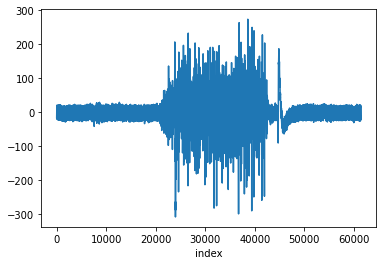

In [4]:
emg_sig.plot()

In [10]:
# 1. Filtration
filtered_sig, filtered_sig_zero_ph = filter_emg(emg_sig, fs=fs, Rs=Rs, notch=True)
# 2. RMS
rms_sig = rms(filtered_sig, window=window, stride=stride, fs=fs)
rms_coeff = rms_sig.max()
# 3. Normalization
norm_emg = normalize_emg(filtered_sig, rms_coeff)
# 4. Classification of 

In [16]:
rms_sig.shape

(61440,)